# Ridge Regression
<b>Ridge regression</b> is a type of regularized regression model. This means it is a variation of the standard linear regression model that includes a regularized term in the cost function. The purpose of this is to prevent Overfitting. Ridge Regression adds an <b>L2 regularization</b> term to the linear equation. That’s why it is also known as <b>L2 Regularization</b> or <b>L2 Norm</b>.

# Lasso Regression
<b>Lasso Regression</b> is also a type of regularization linear model. It also adds a penalty term to the cost function but it adds L1 regularization instead of L2 regularization and hence is also known as <b>L1 Regularization</b> or <b>L1 Norm</b>. This term is the sum of the absolute values of the coefficients, multiplied by a constant lambda.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

## Disable Warnings

In [2]:
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

## Loading Data

In [3]:
data = pd.read_csv("ad.csv")

In [4]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


## Removing the Unnamed: 0 column

In [5]:
data.drop(["Unnamed: 0"], axis = 1, inplace = True)

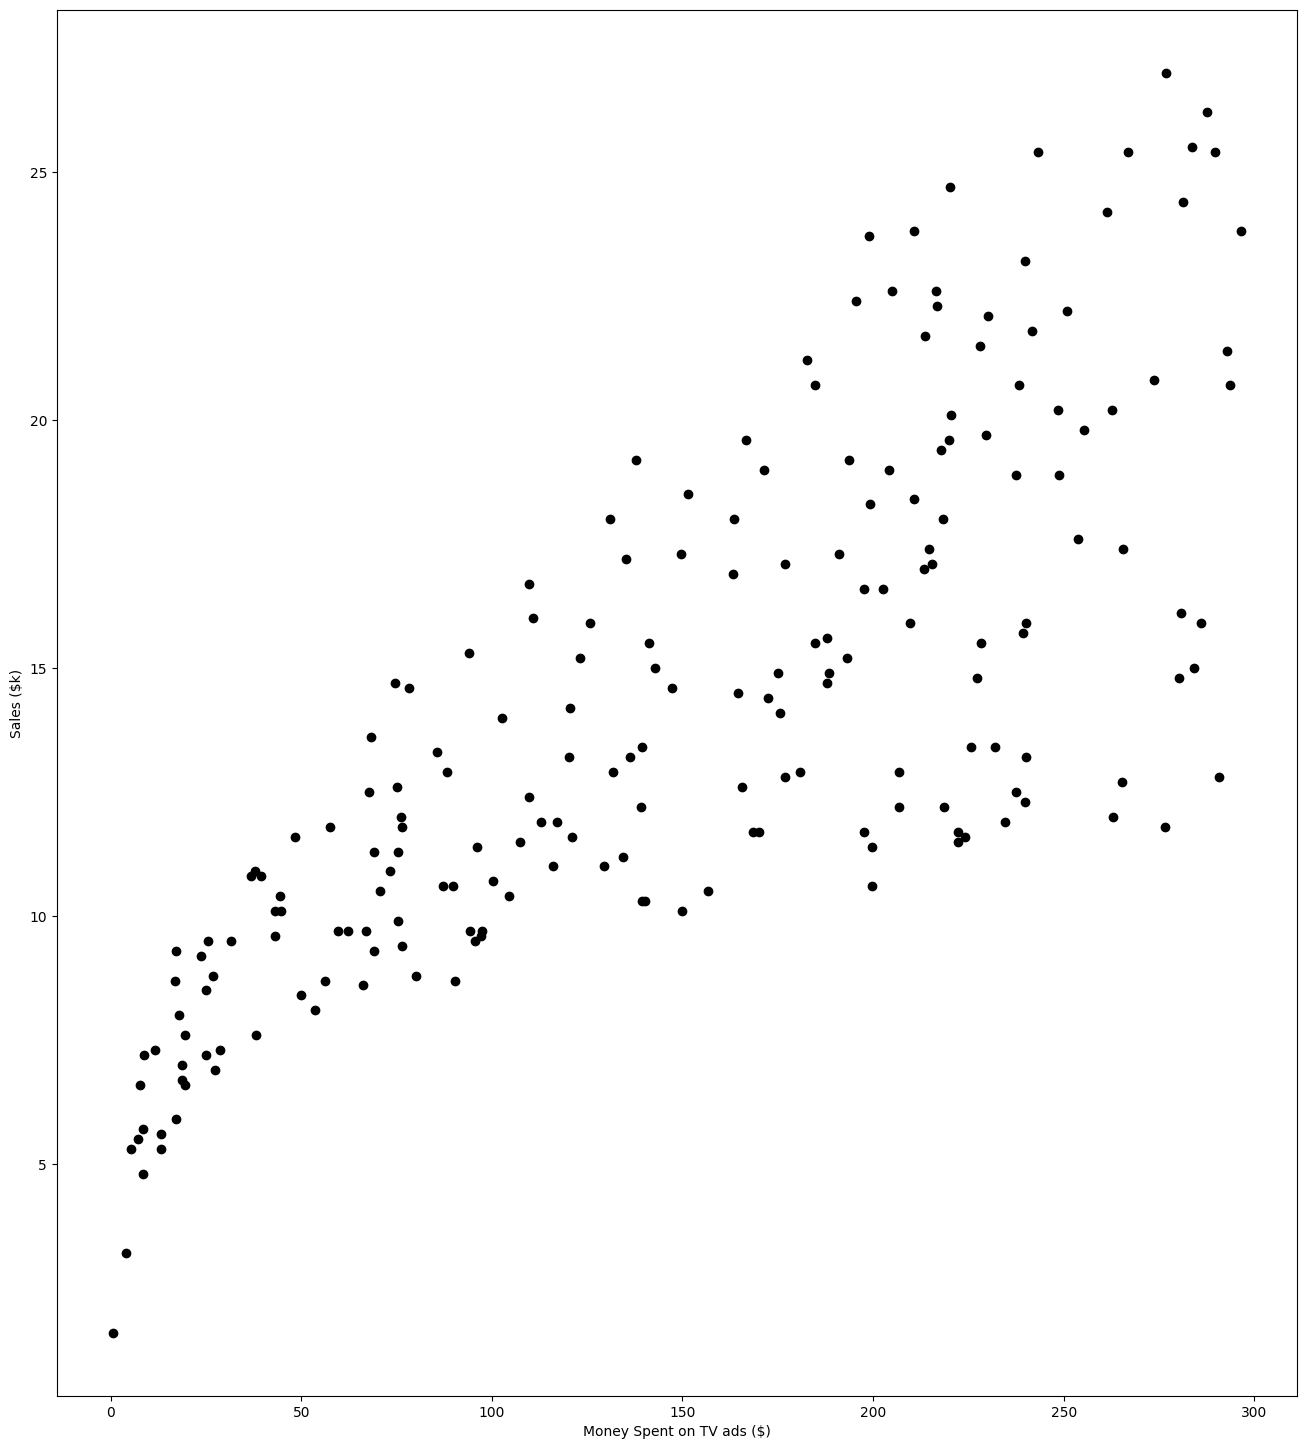

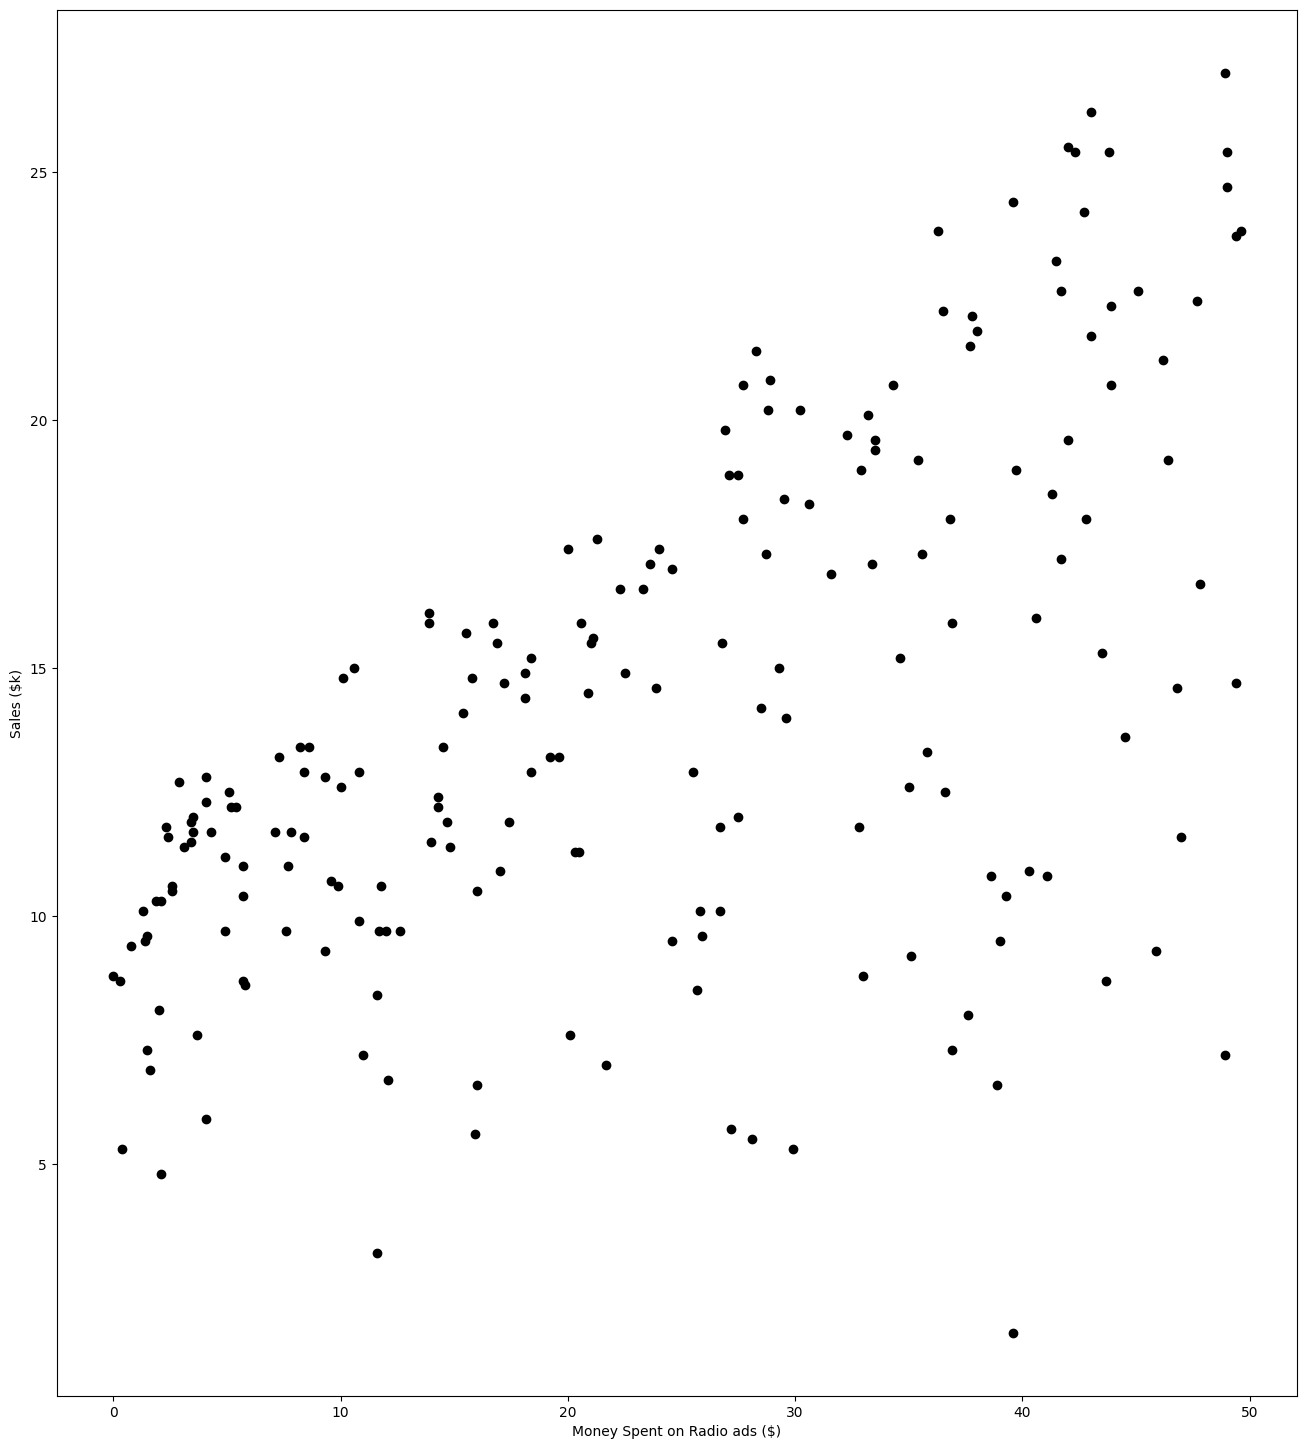

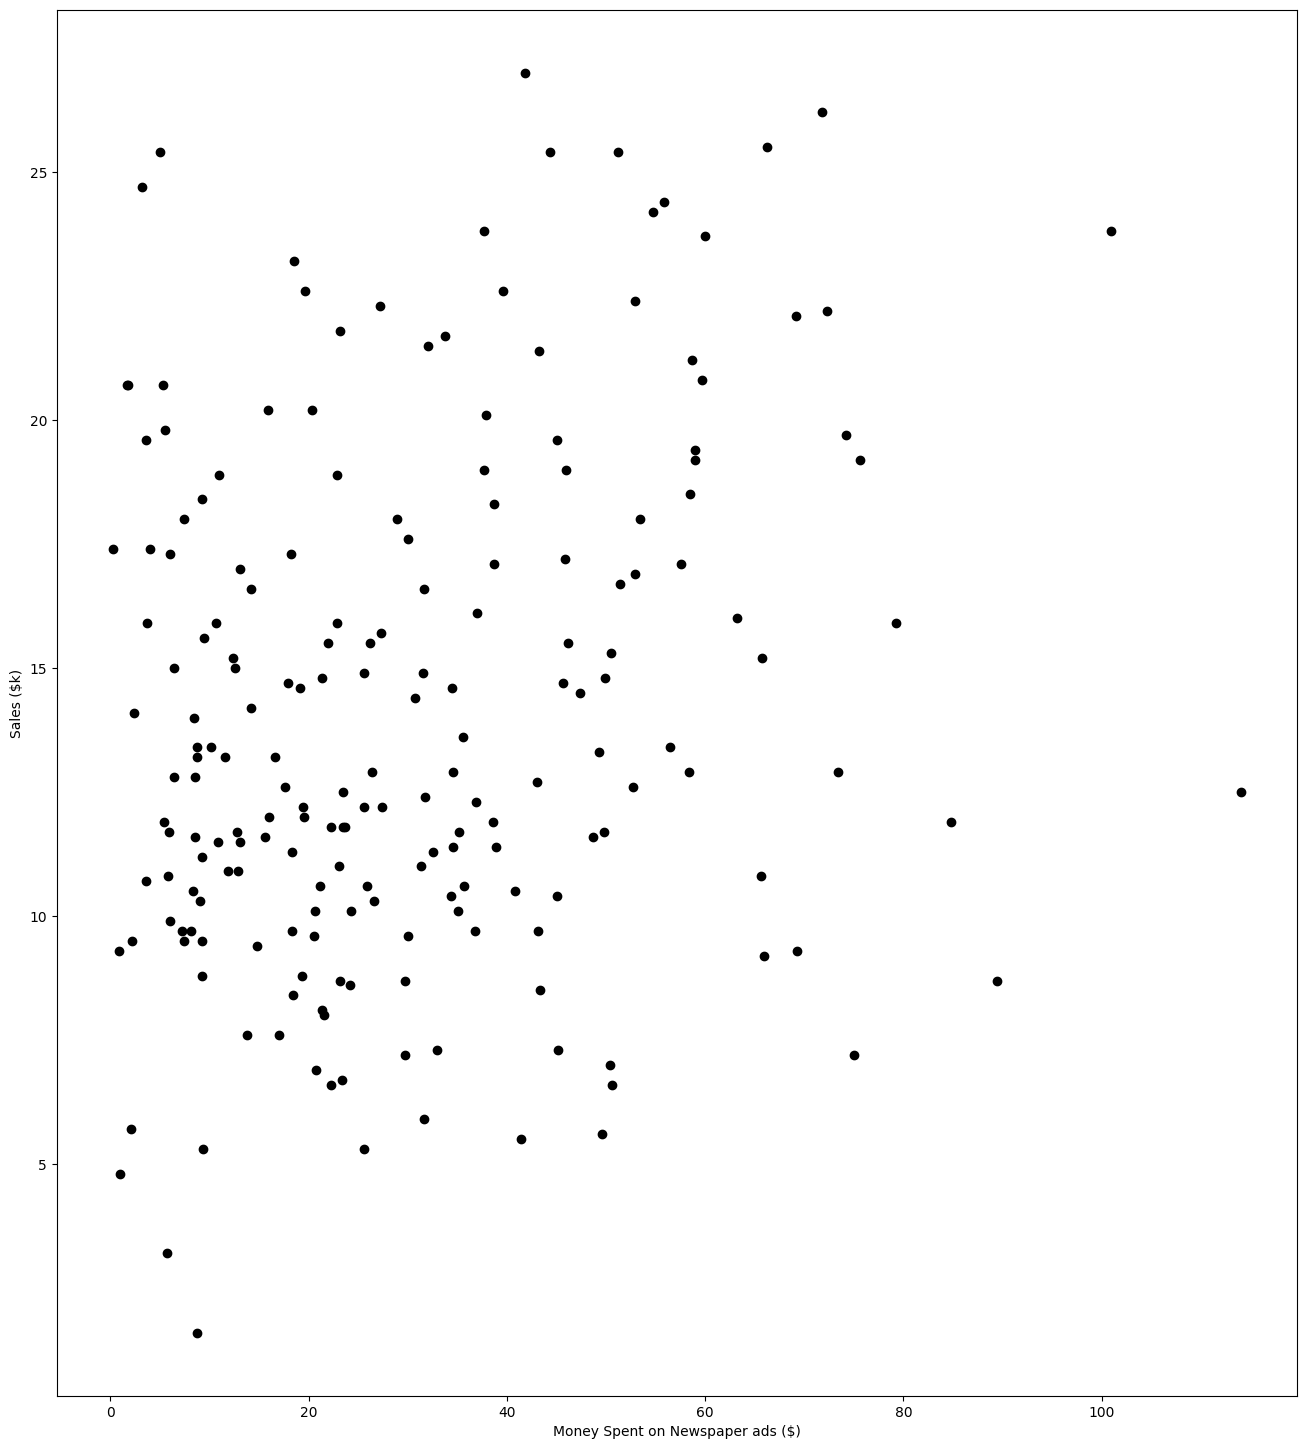

In [6]:
def scatter_plot(feature, target):
    plt.figure(figsize=(16, 18))
    plt.scatter(data[feature],
                data[target],
                c='black'
                )
    plt.xlabel("Money Spent on {} ads ($)".format(feature))
    plt.ylabel("Sales ($k)")
    plt.savefig(f"{feature} Scatter Plot")
    plt.show()
scatter_plot("TV", "Sales")
scatter_plot("Radio", "Sales")
scatter_plot("Newspaper", "Sales")

## Multiple Linear Regression Algorithm


In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

xs = data.drop(["Sales"], axis=1)
y = data["Sales"].values.reshape(-1,1)
linreg = LinearRegression()
MSE = cross_val_score(linreg, xs, y, scoring="neg_mean_squared_error", cv=5)

mean_MSE = np.mean(MSE)
print(mean_MSE)

-3.0729465971002106


## Ridge Regression


In [8]:
# Ridge Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()

parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regression.fit(xs, y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             scoring='neg_mean_squared_error')

In [9]:
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

{'alpha': 20}
-3.072671338341143


## Lasso Regression

In [10]:
from sklearn.linear_model import Lasso
lasso = Lasso()

parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regression.fit(xs, y)

print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

{'alpha': 1}
-3.041405896751369
